In [1]:
import sys
import datetime

import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt

sys.path.insert(0,'..')
import covid19_inference as cov19

confirmed_cases = cov19.get_jhu_confirmed_cases()

country = 'Germany'
date_data_begin = datetime.datetime(2020,3,1)
date_data_end   = cov19.get_last_date(confirmed_cases)

#date_data_end   = datetime.datetime(2020,3,28)
num_days_data = (date_data_end-date_data_begin).days
diff_data_sim = 16 # should be significantly larger than the expected delay, in 
                   # order to always fit the same number of data points.
num_days_future = 60
date_begin_sim = date_data_begin - datetime.timedelta(days = diff_data_sim)
date_end_sim   = date_data_end   + datetime.timedelta(days = num_days_future)
num_days_sim = (date_end_sim-date_begin_sim).days

# lambda_easter = 0.15 (reverts quarantine)

pr_beta_I_begin was set to default value 100
pr_median_lambda_0 was set to default value 0.4
pr_sigma_lambda_0 was set to default value 0.5
pr_median_mu was set to default value 0.125
pr_sigma_mu was set to default value 0.2
pr_median_delay was set to default value 8
pr_sigma_delay was set to default value 0.2
pr_beta_sigma_obs was set to default value 10
pr_sigma_lambda of change point 0 was set to default value 0.5
pr_sigma_date_begin_transient of change point 0 was set to default value 3
pr_median_transient_len of change point 0 was set to default value 3
pr_median_transient_len of change point 1 was set to default value 3
pr_median_transient_len of change point 2 was set to default value 3
pr_median_transient_len of change point 3 was set to default value 3
pr_sigma_transient_len of change point 0 was set to default value 0.3
pr_sigma_transient_len of change point 1 was set to default value 0.3
pr_sigma_transient_len of change point 2 was set to default value 0.3
pr_sigma_transient

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 339.02:   7%|▋         | 14088/200000 [00:34<07:39, 404.77it/s]
Convergence achieved at 14100
Interrupted at 14,099 [7%]: Average Loss = 435.64
Multiprocess sampling (6 chains in 6 jobs)
NUTS: [sigma_obs, delay, mu, transient_len_3, transient_len_2, transient_len_1, transient_len_0, transient_begin_3, transient_begin_2, transient_begin_1, transient_begin_0, lambda_4, lambda_3, lambda_2, lambda_1, lambda_0, I_begin]
Sampling 6 chains, 0 divergences: 100%|██████████| 6000/6000 [04:50<00:00, 20.67draws/s]


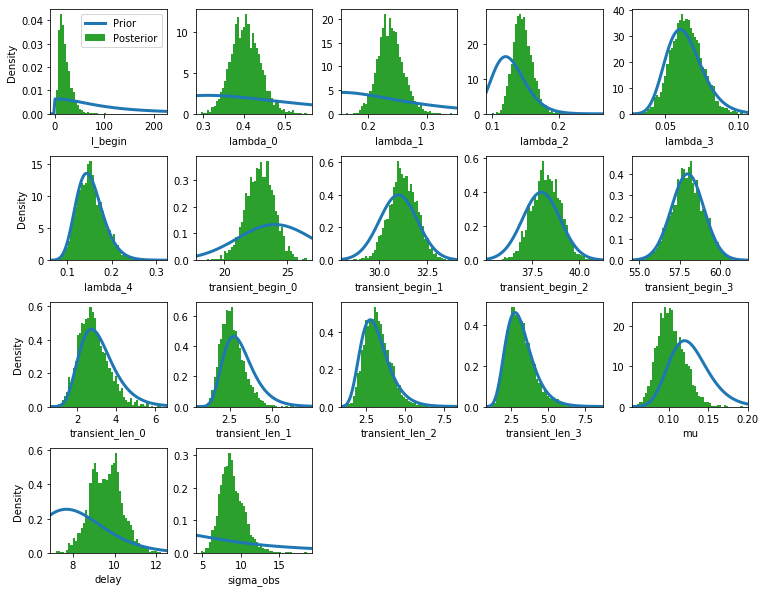

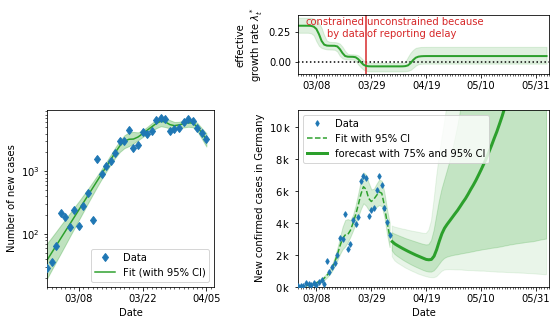

In [2]:
cases_obs = cov19.filter_one_country(confirmed_cases, country,
                                     date_data_begin, date_data_end)

lambda_easter = 0.15

change_points = [dict(pr_mean_date_begin_transient = datetime.datetime(2020,3,9),
                      pr_median_lambda = 0.2),
                 dict(pr_mean_date_begin_transient = datetime.datetime(2020,3,16),
                      pr_sigma_date_begin_transient = 1,
                      pr_median_lambda = 1/8,
                      pr_sigma_lambda = 0.2),
                 dict(pr_mean_date_begin_transient = datetime.datetime(2020,3,23),
                      pr_sigma_date_begin_transient = 1,
                      pr_median_lambda = 1/8/2,
                      pr_sigma_lambda = 0.2),
                  dict(pr_mean_date_begin_transient = datetime.datetime(2020,4,12),
                      pr_sigma_date_begin_transient = 1,
                      pr_median_lambda = lambda_easter,
                      pr_sigma_lambda = 0.2)]

model = cov19.SIR_with_change_points(np.diff(cases_obs),change_points,date_begin_sim,num_days_sim,diff_data_sim,N=83e6)
trace = pm.sample(model=model, init='advi', cores=6)

varnames = cov19.plotting.get_all_free_RVs_names(model)
num_cols = 5
num_rows = int(np.ceil(len(varnames)/num_cols))
x_size = num_cols * 2.5
y_size = num_rows * 2.5

fig, axes = plt.subplots(num_rows, num_cols, figsize = (x_size, y_size),squeeze=False)
i_ax = 0
for i_row, axes_row in enumerate(axes):
    for i_col, ax in enumerate(axes_row):
        if i_ax >= len(varnames):
            ax.set_visible(False)
            continue 
        else:
            cov19.plotting.plot_hist(model, trace, ax, varnames[i_ax], 
                                     colors=('tab:blue', 'tab:green'))
        if not i_col == 0:
            ax.set_ylabel('')
        if i_col == 0 and i_row == 0:
            ax.legend()
        i_ax += 1
fig.subplots_adjust(wspace=0.25, hspace=0.4)

fig.savefig('easter_1_params.png')

fig2, axes = cov19.plotting.plot_cases(trace, np.diff(cases_obs), date_begin_sim, diff_data_sim,
                                      colors=('tab:blue', 'tab:green')) 

fig2.savefig('easter_1_timeseries.png')

# lambda_easter = 0.1 (half-way)

pr_beta_I_begin was set to default value 100
pr_median_lambda_0 was set to default value 0.4
pr_sigma_lambda_0 was set to default value 0.5
pr_median_mu was set to default value 0.125
pr_sigma_mu was set to default value 0.2
pr_median_delay was set to default value 8
pr_sigma_delay was set to default value 0.2
pr_beta_sigma_obs was set to default value 10
pr_sigma_lambda of change point 0 was set to default value 0.5
pr_sigma_date_begin_transient of change point 0 was set to default value 3
pr_median_transient_len of change point 0 was set to default value 3
pr_median_transient_len of change point 1 was set to default value 3
pr_median_transient_len of change point 2 was set to default value 3
pr_median_transient_len of change point 3 was set to default value 3
pr_sigma_transient_len of change point 0 was set to default value 0.3
pr_sigma_transient_len of change point 1 was set to default value 0.3
pr_sigma_transient_len of change point 2 was set to default value 0.3
pr_sigma_transient

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 334.67:   7%|▋         | 14996/200000 [00:36<07:28, 412.33it/s]
Convergence achieved at 15000
Interrupted at 14,999 [7%]: Average Loss = 429.9
Multiprocess sampling (6 chains in 6 jobs)
NUTS: [sigma_obs, delay, mu, transient_len_3, transient_len_2, transient_len_1, transient_len_0, transient_begin_3, transient_begin_2, transient_begin_1, transient_begin_0, lambda_4, lambda_3, lambda_2, lambda_1, lambda_0, I_begin]
Sampling 6 chains, 0 divergences: 100%|██████████| 6000/6000 [04:39<00:00, 21.43draws/s]


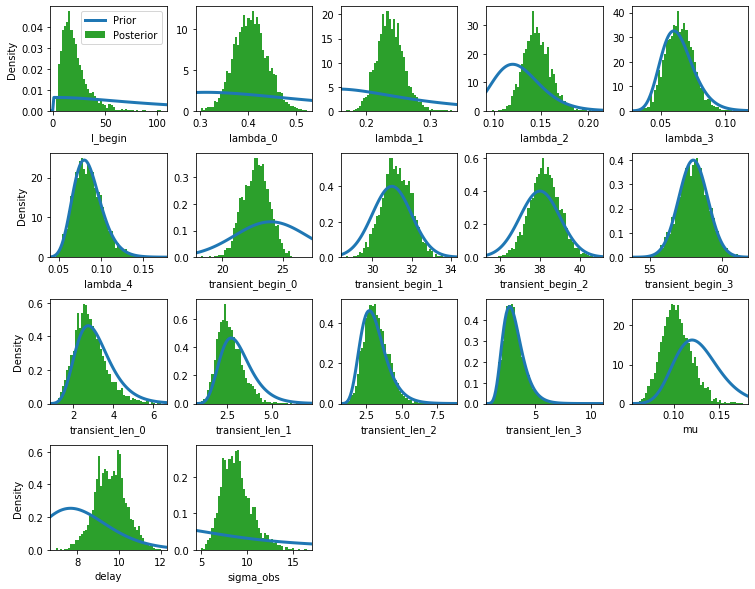

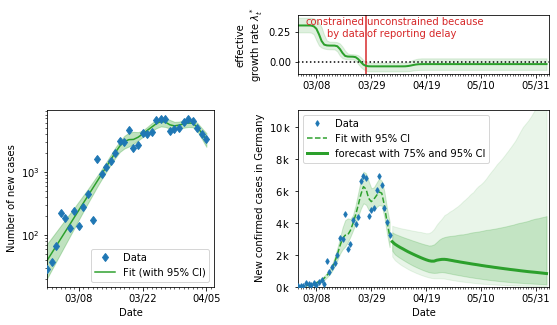

In [3]:
cases_obs = cov19.filter_one_country(confirmed_cases, country,
                                     date_data_begin, date_data_end)

lambda_easter = 1/8/1.5

change_points = [dict(pr_mean_date_begin_transient = datetime.datetime(2020,3,9),
                      pr_median_lambda = 0.2),
                 dict(pr_mean_date_begin_transient = datetime.datetime(2020,3,16),
                      pr_sigma_date_begin_transient = 1,
                      pr_median_lambda = 1/8,
                      pr_sigma_lambda = 0.2),
                 dict(pr_mean_date_begin_transient = datetime.datetime(2020,3,23),
                      pr_sigma_date_begin_transient = 1,
                      pr_median_lambda = 1/8/2,
                      pr_sigma_lambda = 0.2),
                  dict(pr_mean_date_begin_transient = datetime.datetime(2020,4,12),
                      pr_sigma_date_begin_transient = 1,
                      pr_median_lambda = lambda_easter,
                      pr_sigma_lambda = 0.2)]

model = cov19.SIR_with_change_points(np.diff(cases_obs),change_points,date_begin_sim,num_days_sim,diff_data_sim,N=83e6)
trace = pm.sample(model=model, init='advi', cores=6)

varnames = cov19.plotting.get_all_free_RVs_names(model)
num_cols = 5
num_rows = int(np.ceil(len(varnames)/num_cols))
x_size = num_cols * 2.5
y_size = num_rows * 2.5

fig, axes = plt.subplots(num_rows, num_cols, figsize = (x_size, y_size),squeeze=False)
i_ax = 0
for i_row, axes_row in enumerate(axes):
    for i_col, ax in enumerate(axes_row):
        if i_ax >= len(varnames):
            ax.set_visible(False)
            continue 
        else:
            cov19.plotting.plot_hist(model, trace, ax, varnames[i_ax], 
                                     colors=('tab:blue', 'tab:green'))
        if not i_col == 0:
            ax.set_ylabel('')
        if i_col == 0 and i_row == 0:
            ax.legend()
        i_ax += 1
fig.subplots_adjust(wspace=0.25, hspace=0.4)

fig.savefig('easter_2_params.png')

fig2, axes = cov19.plotting.plot_cases(trace, np.diff(cases_obs), date_begin_sim, diff_data_sim,
                                      colors=('tab:blue', 'tab:green')) 

fig2.savefig('easter_2_timeseries.png')

# lambda_easter = 0.14 then 75% quarantine 5 days later (lambda = 0.08)

pr_beta_I_begin was set to default value 100
pr_median_lambda_0 was set to default value 0.4
pr_sigma_lambda_0 was set to default value 0.5
pr_median_mu was set to default value 0.125
pr_sigma_mu was set to default value 0.2
pr_median_delay was set to default value 8
pr_sigma_delay was set to default value 0.2
pr_beta_sigma_obs was set to default value 10
pr_sigma_lambda of change point 0 was set to default value 0.5
pr_sigma_date_begin_transient of change point 0 was set to default value 3
pr_median_transient_len of change point 0 was set to default value 3
pr_median_transient_len of change point 1 was set to default value 3
pr_median_transient_len of change point 2 was set to default value 3
pr_median_transient_len of change point 3 was set to default value 3
pr_median_transient_len of change point 4 was set to default value 3
pr_sigma_transient_len of change point 0 was set to default value 0.3
pr_sigma_transient_len of change point 1 was set to default value 0.3
pr_sigma_transient_

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 340.81:   7%|▋         | 13570/200000 [00:35<08:05, 383.95it/s]
Convergence achieved at 13600
Interrupted at 13,599 [6%]: Average Loss = 437.86
Multiprocess sampling (6 chains in 6 jobs)
NUTS: [sigma_obs, delay, mu, transient_len_4, transient_len_3, transient_len_2, transient_len_1, transient_len_0, transient_begin_4, transient_begin_3, transient_begin_2, transient_begin_1, transient_begin_0, lambda_5, lambda_4, lambda_3, lambda_2, lambda_1, lambda_0, I_begin]
Sampling 6 chains, 0 divergences: 100%|██████████| 6000/6000 [05:05<00:00, 19.61draws/s]


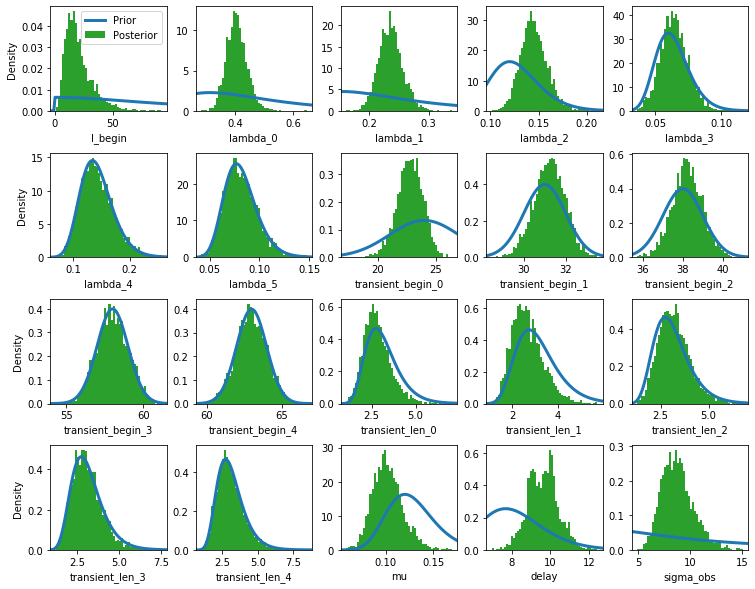

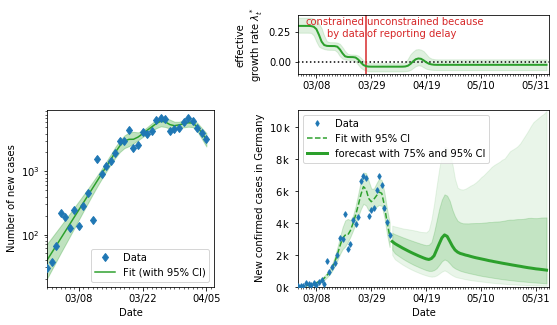

In [4]:
cases_obs = cov19.filter_one_country(confirmed_cases, country,
                                     date_data_begin, date_data_end)

lambda_easter = 0.14

lambda_after_easter = 0.08

change_points = [dict(pr_mean_date_begin_transient = datetime.datetime(2020,3,9),
                      pr_median_lambda = 0.2),
                dict(pr_mean_date_begin_transient = datetime.datetime(2020,3,16),
                      pr_sigma_date_begin_transient = 1,
                      pr_median_lambda = 1/8,
                      pr_sigma_lambda = 0.2),
                dict(pr_mean_date_begin_transient = datetime.datetime(2020,3,23),
                      pr_sigma_date_begin_transient = 1,
                      pr_median_lambda = 1/8/2,
                      pr_sigma_lambda = 0.2),
                dict(pr_mean_date_begin_transient = datetime.datetime(2020,4,12),
                      pr_sigma_date_begin_transient = 1,
                      pr_median_lambda = lambda_easter,
                      pr_sigma_lambda = 0.2),
                dict(pr_mean_date_begin_transient = datetime.datetime(2020,4,17),
                      pr_sigma_date_begin_transient = 1,
                      pr_median_lambda = lambda_after_easter,
                      pr_sigma_lambda = 0.2)]

model = cov19.SIR_with_change_points(np.diff(cases_obs),change_points,date_begin_sim,num_days_sim,diff_data_sim,N=83e6)
trace = pm.sample(model=model, init='advi', cores=6)

varnames = cov19.plotting.get_all_free_RVs_names(model)
num_cols = 5
num_rows = int(np.ceil(len(varnames)/num_cols))
x_size = num_cols * 2.5
y_size = num_rows * 2.5

fig, axes = plt.subplots(num_rows, num_cols, figsize = (x_size, y_size),squeeze=False)
i_ax = 0
for i_row, axes_row in enumerate(axes):
    for i_col, ax in enumerate(axes_row):
        if i_ax >= len(varnames):
            ax.set_visible(False)
            continue 
        else:
            cov19.plotting.plot_hist(model, trace, ax, varnames[i_ax], 
                                     colors=('tab:blue', 'tab:green'))
        if not i_col == 0:
            ax.set_ylabel('')
        if i_col == 0 and i_row == 0:
            ax.legend()
        i_ax += 1
fig.subplots_adjust(wspace=0.25, hspace=0.4)

fig.savefig('easter_3_params.png')

fig2, axes = cov19.plotting.plot_cases(trace, np.diff(cases_obs), date_begin_sim, diff_data_sim,
                                      colors=('tab:blue', 'tab:green')) 

fig2.savefig('easter_3_timeseries.png')